In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# titleType

In [2]:
#reading the train_dataset
train_df = pd.read_csv('train10.csv')

#reading the test dataset
test_df = pd.read_csv('test2.csv')

In [3]:
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','titleType'], axis = 1)
y_train = train_df['titleType']
X_test = test_df.drop(['originalTitle','titleType'], axis = 1)
y_test = test_df['titleType']

In [4]:
# startign with default values
#Initialize the classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [5]:
# Predictions
y_pred = clf.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.7748917748917749
Classification Report:
               precision    recall  f1-score   support

       movie       0.78      0.93      0.85      1795
       short       0.76      0.78      0.77       760
   tvEpisode       0.84      0.86      0.85      1597
tvMiniSeries       0.30      0.13      0.19        75
     tvMovie       0.17      0.08      0.11       299
    tvSeries       0.86      0.94      0.90       409
     tvShort       0.00      0.00      0.00        16
   tvSpecial       0.21      0.08      0.12        48
       video       0.74      0.27      0.40       222
   videoGame       0.14      0.03      0.05        92

    accuracy                           0.77      5313
   macro avg       0.48      0.41      0.42      5313
weighted avg       0.74      0.77      0.75      5313



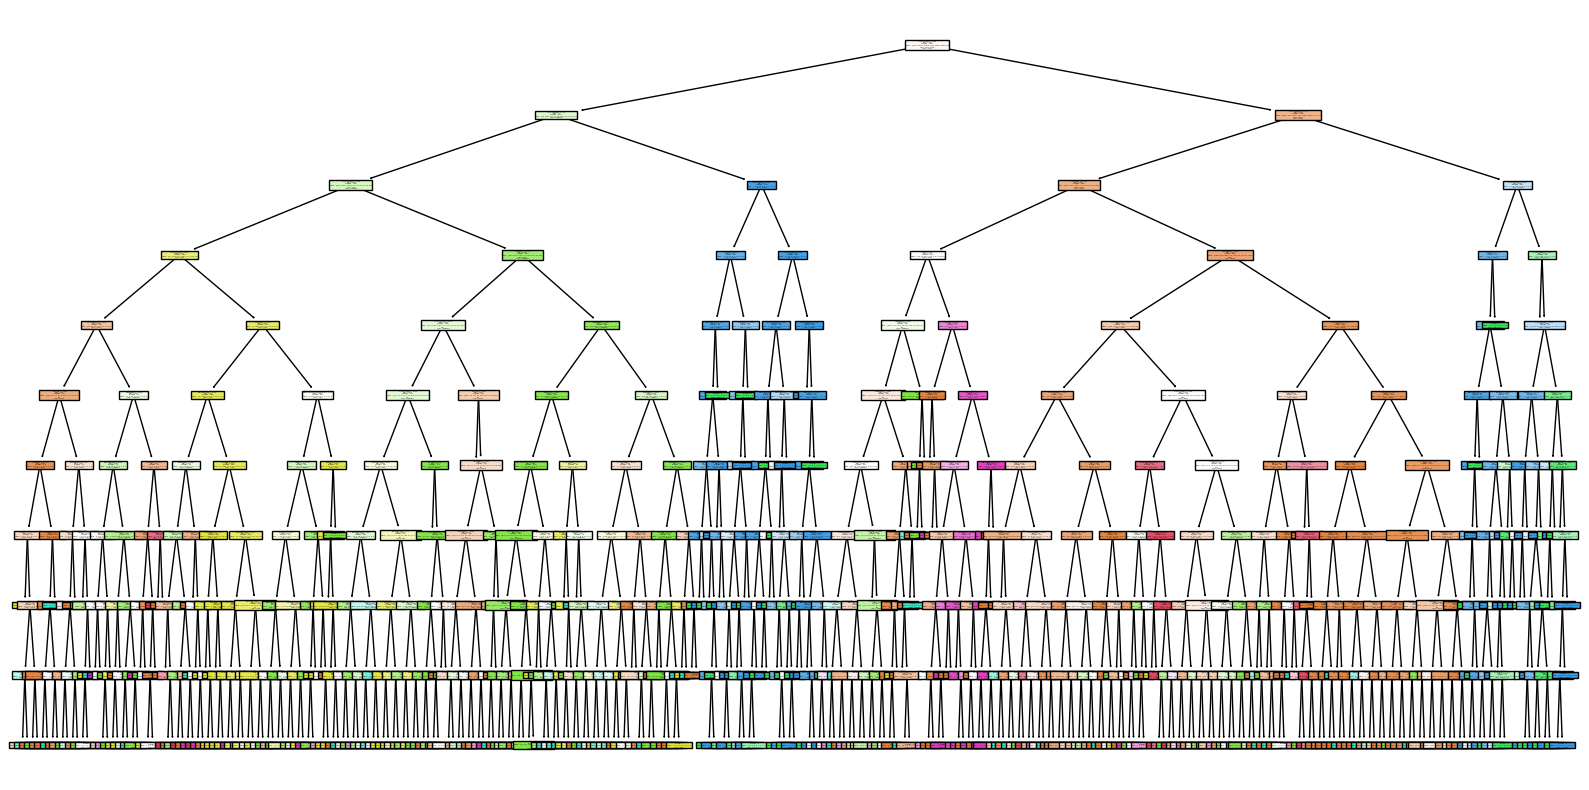

In [26]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Text-based visualization
#print(export_text(clf, feature_names=list(X_train.columns)))

# Plot tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, filled=True)
plt.show()


# Fine Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_


Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [6]:
#after finding the  parameters through gridsearchcv method we tried to see the accuracy
#Initialize the classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf = 2, min_samples_split = 10, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))


Accuracy: 0.759081498211933
Classification Report:
               precision    recall  f1-score   support

       movie       0.78      0.89      0.83      1795
       short       0.74      0.72      0.73       760
   tvEpisode       0.82      0.83      0.83      1597
tvMiniSeries       0.43      0.27      0.33        75
     tvMovie       0.25      0.20      0.22       299
    tvSeries       0.87      0.94      0.90       409
     tvShort       1.00      0.06      0.12        16
   tvSpecial       0.42      0.10      0.17        48
       video       0.50      0.35      0.41       222
   videoGame       0.27      0.04      0.07        92

    accuracy                           0.76      5313
   macro avg       0.61      0.44      0.46      5313
weighted avg       0.74      0.76      0.74      5313



In [29]:
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter distributions
param_dist = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'criterion': ['gini', 'entropy']
}

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=50, cv=5, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Best model
best_model = random_search.best_estimator_


Best Parameters: {'min_samples_split': 6, 'min_samples_leaf': 15, 'max_depth': None, 'criterion': 'gini'}


In [6]:
#after finding the  parameters through randomizedSearchCV method we tried to see the accuracy
#Initialize the classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf = 15, min_samples_split = 6, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.7763975155279503
Classification Report:
               precision    recall  f1-score   support

       movie       0.77      0.91      0.84      1795
       short       0.77      0.74      0.75       760
   tvEpisode       0.85      0.86      0.86      1597
tvMiniSeries       0.62      0.11      0.18        75
     tvMovie       0.25      0.17      0.20       299
    tvSeries       0.86      0.99      0.92       409
     tvShort       0.00      0.00      0.00        16
   tvSpecial       0.10      0.04      0.06        48
       video       0.62      0.36      0.45       222
   videoGame       0.29      0.02      0.04        92

    accuracy                           0.78      5313
   macro avg       0.51      0.42      0.43      5313
weighted avg       0.75      0.78      0.75      5313



C:\Users\tanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

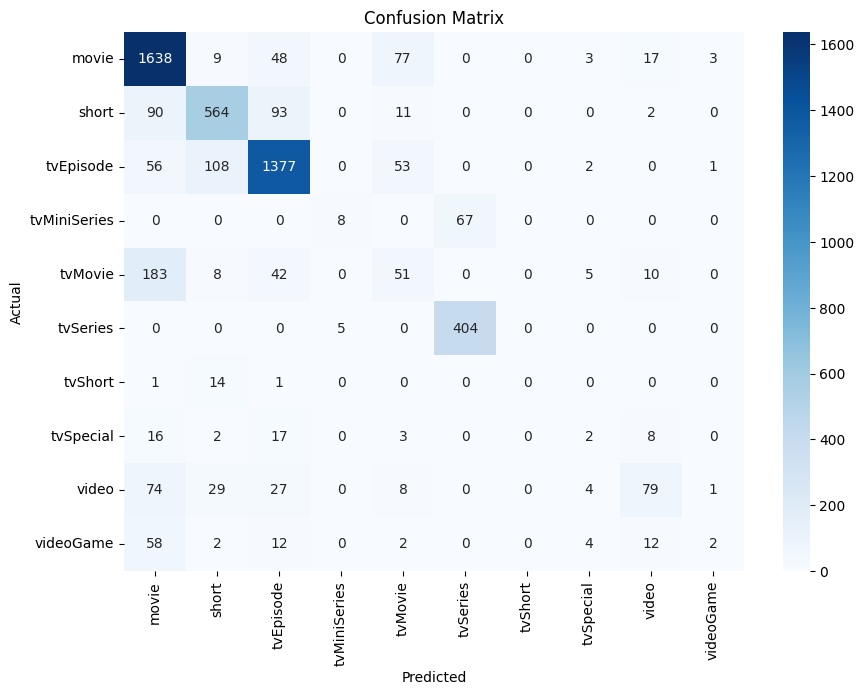

In [8]:
import seaborn as sns
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

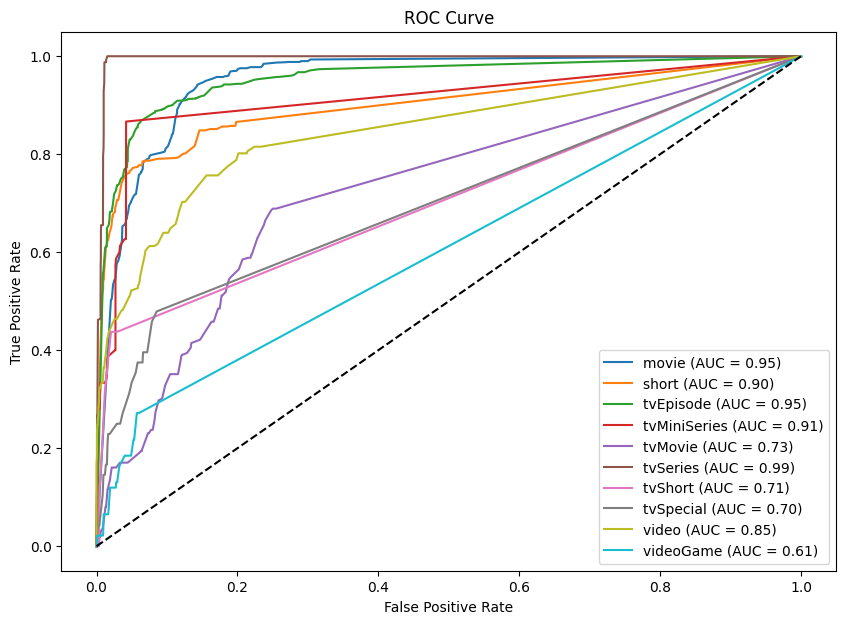

In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=clf.classes_)
y_pred_proba = clf.predict_proba(X_test)  # Predicted probabilities

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i, class_label in enumerate(clf.classes_):
    fpr[class_label], tpr[class_label], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves
plt.figure(figsize=(10, 7))
for class_label in clf.classes_:
    plt.plot(fpr[class_label], tpr[class_label], label=f"{class_label} (AUC = {roc_auc[class_label]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()


In [12]:
j=0
for i in X_train.columns:
    print(i,clf.feature_importances_[j])
    j+=1


startYear 0.04599606159168468
runtimeMinutes 0.4754596380236425
awardWins 0.005192856059878699
numVotes 0.0076966384208236064
totalImages 0.03100030929964906
totalVideos 0.0033627173202763296
totalCredits 0.05140660231565569
criticReviewsTotal 0.0038955394874972643
awardNominationsExcludeWins 0.004874342977565126
canHaveEpisodes 0.17145821370155473
isAdult 0.01419491648150638
numRegions 0.06742804837209804
userReviewsTotal 0.0022239628301747474
ratingCount 0.012092694355897162
averageRating 0.010610969843714745
genresEncoded 0.05739929987844014
countryEncoded 0.035707189039941016


In [32]:
# the overall accuracy is increased by 2%
# But, as the classes are so imbalanced we tried to generate synthetic samples for underrepresented classes using SMOTE technique
# We also tried to Assign higher weights to underrepresented classes in the decision tree model. 
#In scikit-learn, this can be done using the class_weight='balanced' parameter in the DecisionTreeClassifier.

In [5]:
# we tried to increase the accuracy using backward elimination removing the least important row
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','titleType','numVotes','userReviewsTotal','criticReviewsTotal','totalVideos','awardWins','awardNominationsExcludeWins'], axis = 1)
y_train = train_df['titleType']
X_test = test_df.drop(['originalTitle','titleType','numVotes','userReviewsTotal','criticReviewsTotal','totalVideos','awardWins','awardNominationsExcludeWins'], axis = 1)
y_test = test_df['titleType']


#Initialize the classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf = 15, min_samples_split = 6, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.7763975155279503
Classification Report:
               precision    recall  f1-score   support

       movie       0.77      0.91      0.84      1795
       short       0.77      0.74      0.75       760
   tvEpisode       0.85      0.86      0.86      1597
tvMiniSeries       0.62      0.11      0.18        75
     tvMovie       0.25      0.17      0.20       299
    tvSeries       0.86      0.99      0.92       409
     tvShort       0.00      0.00      0.00        16
   tvSpecial       0.10      0.04      0.06        48
       video       0.62      0.36      0.45       222
   videoGame       0.29      0.02      0.04        92

    accuracy                           0.78      5313
   macro avg       0.51      0.42      0.43      5313
weighted avg       0.75      0.78      0.75      5313



C:\Users\tanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [9]:
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Recompute class weights for the resampled data
classes = np.unique(y_train_resampled)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_resampled)
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

# Initialize Decision Tree with class weights
#class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
#class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

clf = DecisionTreeClassifier(class_weight=class_weight_dict, max_depth=None, min_samples_leaf = 15, min_samples_split =6,  random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Predictions and Evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       movie       0.87      0.74      0.80      1795
       short       0.68      0.70      0.69       760
   tvEpisode       0.90      0.71      0.80      1597
tvMiniSeries       0.38      0.60      0.46        75
     tvMovie       0.23      0.45      0.31       299
    tvSeries       0.92      0.82      0.86       409
     tvShort       0.07      0.31      0.11        16
   tvSpecial       0.11      0.35      0.17        48
       video       0.28      0.45      0.35       222
   videoGame       0.19      0.21      0.20        92

    accuracy                           0.69      5313
   macro avg       0.46      0.54      0.48      5313
weighted avg       0.77      0.69      0.72      5313



In [16]:
y_train_resampled.value_counts()

titleType
tvEpisode       5279
videoGame       5279
movie           5279
tvSeries        5279
video           5279
tvMiniSeries    5279
short           5279
tvMovie         5279
tvSpecial       5279
tvShort         5279
Name: count, dtype: int64

In [17]:
train_df.columns

Index(['originalTitle', 'startYear', 'runtimeMinutes', 'awardWins', 'numVotes',
       'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal',
       'titleType', 'awardNominationsExcludeWins', 'canHaveEpisodes',
       'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount',
       'averageRating', 'genresEncoded', 'countryEncoded'],
      dtype='object')

# averageRating

In [58]:
#reading the train_dataset
train_df = pd.read_csv('train11.csv')

#reading the test dataset
test_df = pd.read_csv('test3.csv')

In [59]:
# Define mapping function
def categorize_rating(rating):
    if rating <= 4.5:
        return 'low'
    elif rating == 5.5:
        return 'average'
    elif rating == 6.5:
        return 'aboveAverage'
    elif rating == 7.5:
        return 'good'
    elif rating >= 8.5:
        return 'veryGood'

# Apply the mapping to the 'averageRating' column
train_df['averageRating'] = train_df['averageRating'].apply(categorize_rating)
test_df['averageRating'] = test_df['averageRating'].apply(categorize_rating)


In [60]:
train_df['averageRating'].value_counts()

averageRating
good            4680
aboveAverage    4440
average         2717
veryGood        2336
low             1765
Name: count, dtype: int64

In [61]:
test_df['averageRating'].value_counts()

averageRating
good            1569
aboveAverage    1474
average          909
veryGood         776
low              585
Name: count, dtype: int64

In [62]:
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','averageRating'], axis = 1)
y_train = train_df['averageRating']
X_test = test_df.drop(['originalTitle','averageRating'], axis = 1)
y_test = test_df['averageRating']

In [63]:
# startign with default values
#Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.3041596085074346
Classification Report:
               precision    recall  f1-score   support

aboveAverage       0.31      0.31      0.31      1474
     average       0.24      0.24      0.24       909
        good       0.38      0.37      0.37      1569
         low       0.27      0.27      0.27       585
    veryGood       0.26      0.28      0.27       776

    accuracy                           0.30      5313
   macro avg       0.29      0.29      0.29      5313
weighted avg       0.30      0.30      0.30      5313



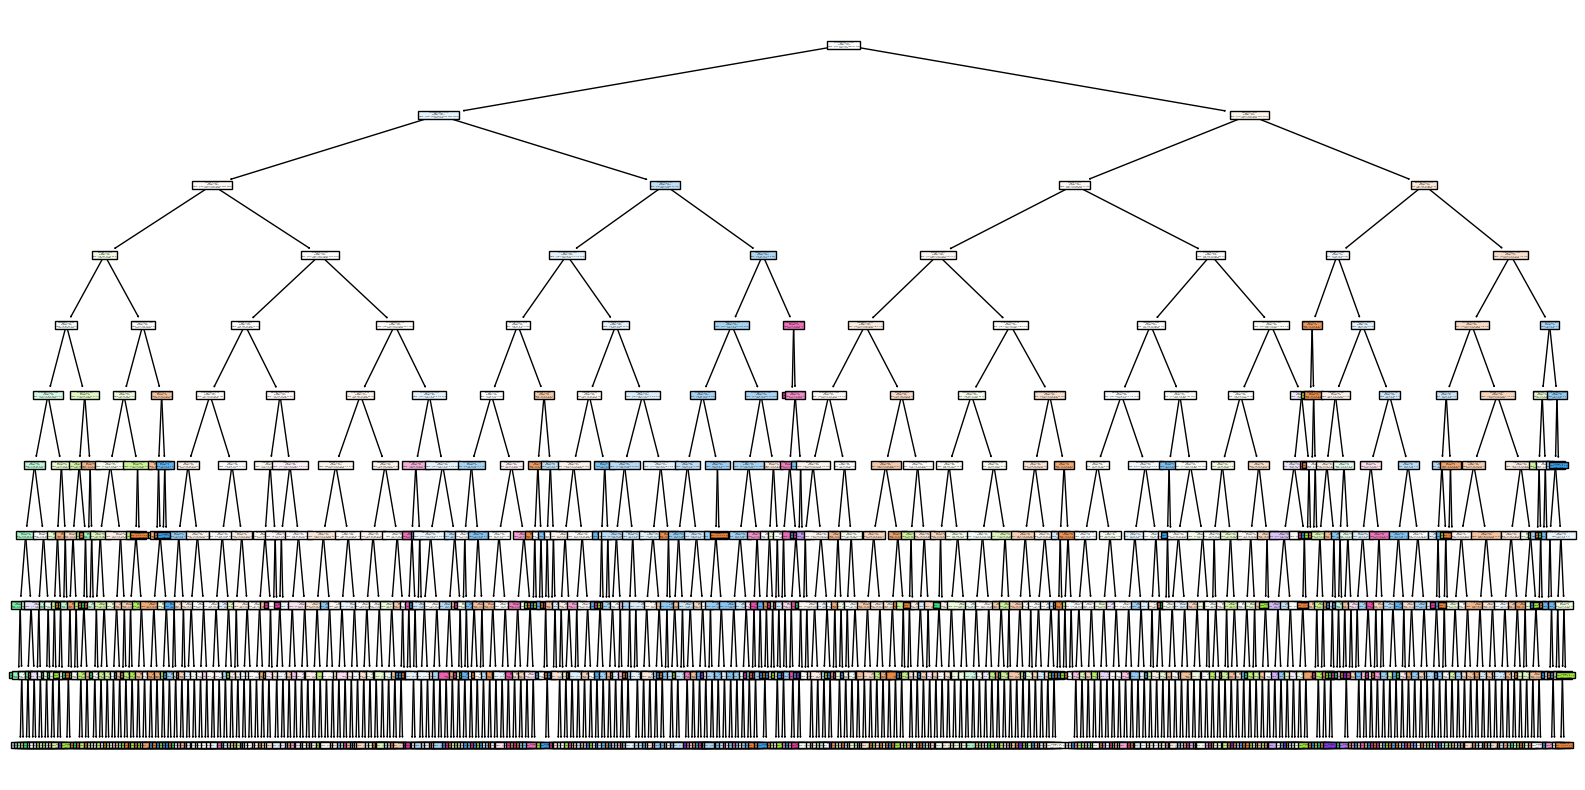

In [45]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Text-based visualization
#print(export_text(clf, feature_names=list(X_train.columns)))

# Plot tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, filled=True)
plt.show()


In [64]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [65]:
#after finding the  parameters through gridsearchcv method we tried to see the accuracy
#Initialize the classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf = 5, min_samples_split = 2, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))


Accuracy: 0.36231884057971014
Classification Report:
               precision    recall  f1-score   support

aboveAverage       0.34      0.38      0.36      1474
     average       0.31      0.23      0.26       909
        good       0.40      0.55      0.46      1569
         low       0.37      0.25      0.29       585
    veryGood       0.34      0.20      0.25       776

    accuracy                           0.36      5313
   macro avg       0.35      0.32      0.33      5313
weighted avg       0.36      0.36      0.35      5313



In [66]:
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter distributions
param_dist = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'criterion': ['gini', 'entropy']
}

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=50, cv=5, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Best model
best_model = random_search.best_estimator_


Best Parameters: {'min_samples_split': 8, 'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'gini'}


In [67]:
#after finding the  parameters through randomizedSearchCV method we tried to see the accuracy
#Initialize the classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf = 5, min_samples_split = 8, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.36231884057971014
Classification Report:
               precision    recall  f1-score   support

aboveAverage       0.34      0.38      0.36      1474
     average       0.31      0.23      0.26       909
        good       0.40      0.55      0.46      1569
         low       0.37      0.25      0.29       585
    veryGood       0.34      0.20      0.25       776

    accuracy                           0.36      5313
   macro avg       0.35      0.32      0.33      5313
weighted avg       0.36      0.36      0.35      5313



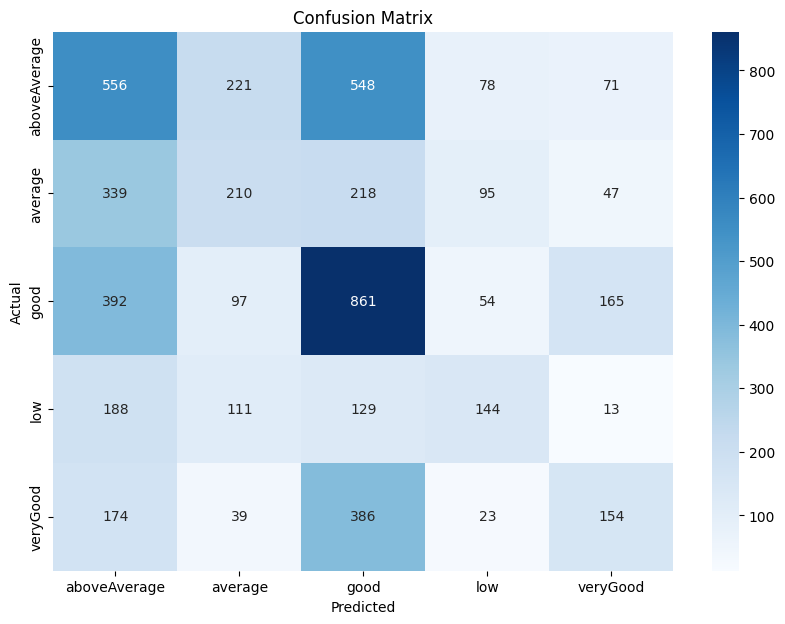

In [68]:
import seaborn as sns
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

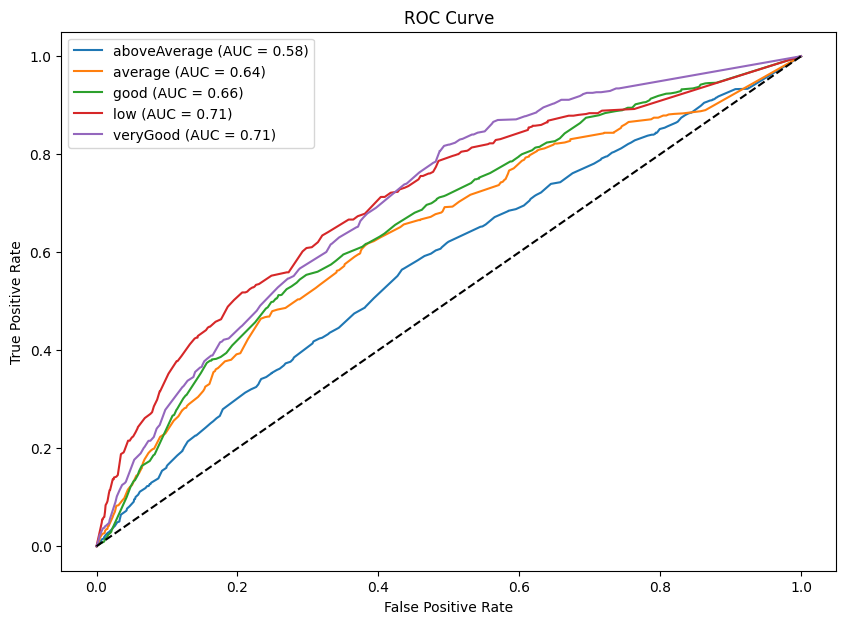

In [69]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=clf.classes_)
y_pred_proba = clf.predict_proba(X_test)  # Predicted probabilities

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i, class_label in enumerate(clf.classes_):
    fpr[class_label], tpr[class_label], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves
plt.figure(figsize=(10, 7))
for class_label in clf.classes_:
    plt.plot(fpr[class_label], tpr[class_label], label=f"{class_label} (AUC = {roc_auc[class_label]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()


In [70]:
j=0
for i in X_train.columns:
    print(i,clf.feature_importances_[j])
    j+=1

startYear 0.14976391661877594
runtimeMinutes 0.07389443601902743
awardWins 0.027715721862017484
numVotes 0.07344278760586274
totalImages 0.02843777770249299
totalVideos 0.0
totalCredits 0.07540998789727474
criticReviewsTotal 0.030783035707570378
awardNominationsExcludeWins 0.013958486770755289
canHaveEpisodes 0.0068077577016739345
isAdult 0.008481383593827056
numRegions 0.0384764818211185
userReviewsTotal 0.03605983304498102
ratingCount 0.08515761711662198
titleTypeEncoded 0.2054404790599914
genresEncoded 0.07933713900492834
countryEncoded 0.06683315847308076


In [71]:
# we tried to increase the accuracy using backward elimination removing the least important row
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','averageRating','totalVideos','awardWins','awardNominationsExcludeWins','canHaveEpisodes','isAdult'], axis = 1)
y_train = train_df['averageRating']
X_test = test_df.drop(['originalTitle','averageRating','totalVideos','awardWins','awardNominationsExcludeWins','canHaveEpisodes','isAdult'], axis = 1)
y_test = test_df['averageRating']


#Initialize the classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf = 15, min_samples_split = 6, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.3448146056841709
Classification Report:
               precision    recall  f1-score   support

aboveAverage       0.32      0.43      0.37      1474
     average       0.31      0.24      0.27       909
        good       0.40      0.44      0.42      1569
         low       0.37      0.22      0.28       585
    veryGood       0.28      0.20      0.23       776

    accuracy                           0.34      5313
   macro avg       0.34      0.31      0.31      5313
weighted avg       0.34      0.34      0.34      5313



In [72]:
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Recompute class weights for the resampled data
classes = np.unique(y_train_resampled)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_resampled)
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

# Initialize Decision Tree with class weights
#class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
#class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

clf = DecisionTreeClassifier(class_weight=class_weight_dict, max_depth=None, min_samples_leaf = 15, min_samples_split =6,  random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Predictions and Evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

aboveAverage       0.34      0.27      0.30      1474
     average       0.29      0.28      0.28       909
        good       0.41      0.30      0.34      1569
         low       0.23      0.42      0.30       585
    veryGood       0.26      0.35      0.30       776

    accuracy                           0.31      5313
   macro avg       0.31      0.32      0.31      5313
weighted avg       0.33      0.31      0.31      5313



In [73]:
y_train_resampled.value_counts()

averageRating
good            4680
average         4680
veryGood        4680
aboveAverage    4680
low             4680
Name: count, dtype: int64